<a href="https://colab.research.google.com/github/batrdn/tesseract-mn/blob/main/tesseract_mn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytesseract
!pip install opencv-contrib-python
!sudo apt install tesseract-ocr tesseract-ocr-all

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=8ca034425a53242a0060445b7f5522960cb6c5efb64ca9f105803a5d489bc309
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-afr tesseract-ocr-amh tesseract-ocr-ara tesseract-ocr-asm
  tesseract-ocr-aze tesseract-ocr-aze-cyrl tesseract-ocr-bel tesseract-ocr-ben
  tesseract-ocr-bod tesseract-ocr-bos tesseract-ocr-bre tesseract-ocr-bul
  tesseract-ocr-cat tesseract-ocr-ceb tesseract-ocr-ces tesseract-ocr-chi-sim
  tesseract-ocr-chi-sim-vert tesseract-ocr-chi-tra tesseract-ocr-chi-tra-vert
  tesseract-ocr-chr tesseract-ocr-cos tesseract-ocr-cym tesseract-ocr-dan
  tesseract-ocr-deu tesseract-ocr-div tesseract-ocr-dzo tesseract-ocr-ell
  tesseract-ocr-en

In [2]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

In [3]:
image = cv2.imread('image.png')
result = pytesseract.image_to_string(image, lang="mon")
print(result)

Төгсгөлгүйн нууц

Төгсгөлгүйн тухай үзэл санаа математикийг бүхэлд
нь хамарсан байдаг гэж хэлэхэд хилсдэхгүй бизээ. Ма-
тематикт тус тус юмсыг (тоо, геометрийн дүрс) авч
үзэхээсээ бүх натурал тоо, бүх гурвалжны олонлог
гэх мэт зүйлийг сонирхох нь олонтой. Ийм олонлогууд
тоо тоймшгүй олон тус тус юмсаас бүрдэнэ.

Математикчид, философчид хэн хэн нь төгсгөлгүйн
тухай ухагдахууныг ямагт шохоорхож ирсэн билээ.
Ийнхүү сонирхож эхлэх явдал нэг натурал тооны да-
раа өөр нэг натурал тоо гарч ирдэг, өөрбөр хэлбэл,
натурал тоон дараалал төгсгөлгүй гэдгийг мэддэг бол-
сон тэр цагаас эхэлжээ. Гэвч төгсгөлгүйн тухай суд-
зах гэсэн. анхны оролдлого олон гаж буруу зүйлд
хүргэдэг байж. 5

Жишээ нь грекийн философч Зенон төгсгөлгүйн ту-
хай ухагдахууныг ашиглан хөдөлгөөн байж болохгүй

   

авьс

2

Ахиллес, яст мэлхий хоёр

 

 

 

 



In [4]:
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang="mon")
n_boxes = len(data['level'])

In [5]:
overlay = image.copy()

for i in range(n_boxes):
    text = data['text'][i].lower()
    if 'төгсгөлгүй' in text:
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        cv2.rectangle(overlay, (x, y), (x + w, y + h), (255, 0, 0), -1)

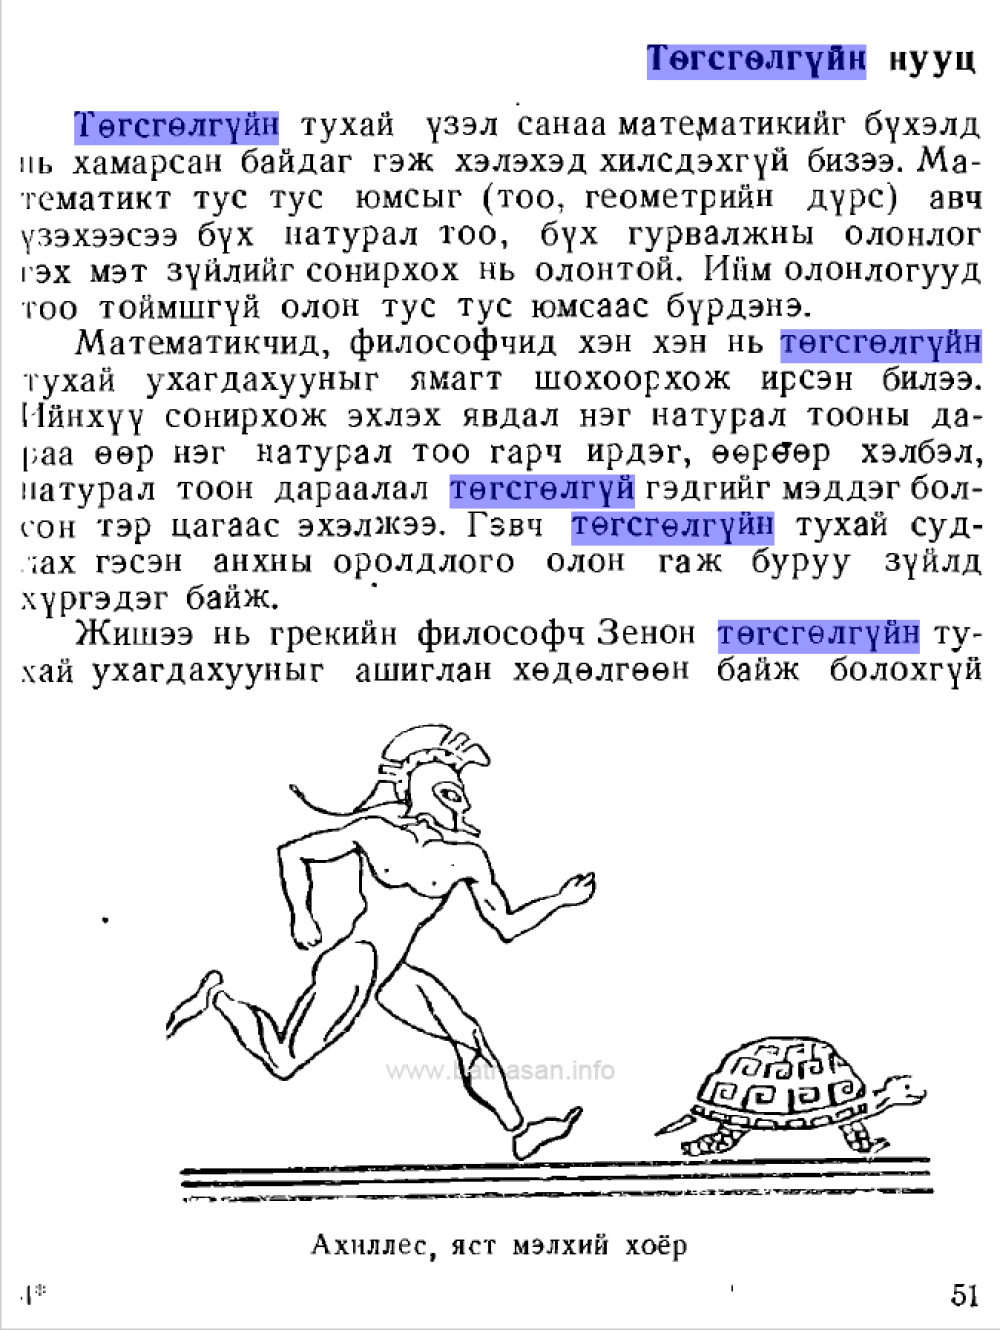

In [6]:
alpha = 0.4
image_new = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
r = 1000.0 / image_new.shape[1]
dim = (1000, int(image_new.shape[0] * r))

resized = cv2.resize(image_new, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)
cv2.waitKey(0)
cv2.destroyAllWindows()